In [1]:
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

# Seed

In [2]:
seed_number = 44

torch.manual_seed(seed_number)
torch.cuda.manual_seed(seed_number)
torch.cuda.manual_seed_all(seed_number) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed_number)
#random.seed(seed_number)

# MNIST data download

In [3]:
train_dataset = torchvision.datasets.MNIST('./data/', train=True, download=True)
test_dataset  = torchvision.datasets.MNIST('./data/', train=False)

# Load dataset

In [4]:
X      = train_dataset.data
X_test = test_dataset.data

print(X.shape)
print(X_test.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


# Normalization

In [5]:
X = X / 255.
X_test = X_test / 255.

X = (X - 0.5) / 0.5
X_test = (X_test - 0.5) / 0.5

# Data loader

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

X = X.to(device=device)
X_test = X_test.to(device=device)

cpu


In [7]:
train_ds = torch.utils.data.TensorDataset(X)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=128, shuffle=True)

# Model

In [8]:
class Generator(torch.nn.Module):
    def __init__(self, d_z):
        super(Generator, self).__init__()
        self.fully_connected_layer_1 = torch.nn.Linear(d_z, 128)
        self.fully_connected_layer_2 = torch.nn.Linear(128, 256)
        self.fully_connected_layer_3 = torch.nn.Linear(256, 512)
        self.fully_connected_layer_4 = torch.nn.Linear(512, 28*28)
        
    def forward(self, xb):        
        out = self.fully_connected_layer_1(xb)
        out = torch.nn.LeakyReLU()(out)
        out = self.fully_connected_layer_2(out)
        out = torch.nn.LeakyReLU()(out)
        out = self.fully_connected_layer_3(out)
        out = torch.nn.LeakyReLU()(out)
        out = self.fully_connected_layer_4(out)
        out = torch.nn.Tanh()(out)
        return out

In [9]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fully_connected_layer_1 = torch.nn.Linear(28*28, 256)
        self.fully_connected_layer_2 = torch.nn.Linear(256,   128)
        self.fully_connected_layer_3 = torch.nn.Linear(128,   64)
        self.fully_connected_layer_4 = torch.nn.Linear(64,    1)
        
    def forward(self, xb):        
        out = self.fully_connected_layer_1(xb)
        out = torch.nn.LeakyReLU()(out)
        out = self.fully_connected_layer_2(out)
        out = torch.nn.LeakyReLU()(out)
        out = self.fully_connected_layer_3(out)
        out = torch.nn.LeakyReLU()(out)
        out = self.fully_connected_layer_4(out)
        out = torch.nn.Sigmoid()(out)
        return out

In [10]:
d_z = 64

Generator = Generator(d_z=d_z).to(device)
Discriminator = Discriminator().to(device)

print(Generator)
print(Discriminator)

Generator(
  (fully_connected_layer_1): Linear(in_features=64, out_features=128, bias=True)
  (fully_connected_layer_2): Linear(in_features=128, out_features=256, bias=True)
  (fully_connected_layer_3): Linear(in_features=256, out_features=512, bias=True)
  (fully_connected_layer_4): Linear(in_features=512, out_features=784, bias=True)
)
Discriminator(
  (fully_connected_layer_1): Linear(in_features=784, out_features=256, bias=True)
  (fully_connected_layer_2): Linear(in_features=256, out_features=128, bias=True)
  (fully_connected_layer_3): Linear(in_features=128, out_features=64, bias=True)
  (fully_connected_layer_4): Linear(in_features=64, out_features=1, bias=True)
)


# Cost function

In [11]:
criterion = torch.nn.BCELoss()

# Optimizer

In [12]:
D_optimizer = torch.optim.Adam(Discriminator.parameters(), lr=0.0002)
G_optimizer = torch.optim.Adam(Generator.parameters(), lr=0.0002)

# Training

======== Epoch 1 =======
Loss     => G:1.82146, D:0.36179
Accuracy => G:17.12%, D:84.39%, Elapsed time => 12.468 sec

======== Epoch 2 =======
Loss     => G:4.30355, D:0.17323
Accuracy => G:0.13%, D:94.43%, Elapsed time => 11.816 sec

======== Epoch 3 =======
Loss     => G:2.83441, D:0.41310
Accuracy => G:3.92%, D:83.78%, Elapsed time => 11.716 sec

======== Epoch 4 =======
Loss     => G:1.63366, D:0.56966
Accuracy => G:7.42%, D:72.42%, Elapsed time => 11.679 sec

======== Epoch 5 =======
Loss     => G:1.30613, D:0.64752
Accuracy => G:13.29%, D:65.74%, Elapsed time => 11.689 sec


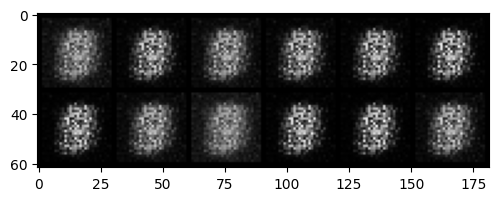


======== Epoch 6 =======
Loss     => G:1.02634, D:0.66849
Accuracy => G:21.17%, D:66.51%, Elapsed time => 11.682 sec

======== Epoch 7 =======
Loss     => G:0.97284, D:0.65943
Accuracy => G:26.50%, D:63.10%, Elapsed time => 11.655 sec

======== Epoch 8 =======
Loss     => G:1.23050, D:0.47071
Accuracy => G:7.12%, D:82.27%, Elapsed time => 11.597 sec

======== Epoch 9 =======
Loss     => G:2.17246, D:0.39850
Accuracy => G:1.26%, D:85.55%, Elapsed time => 11.568 sec

======== Epoch 10 =======
Loss     => G:1.44277, D:0.58591
Accuracy => G:10.18%, D:72.18%, Elapsed time => 11.650 sec


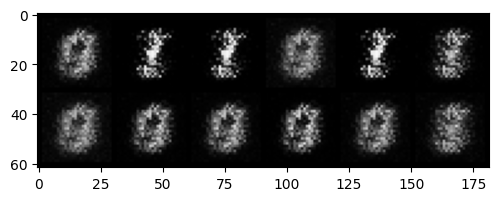


======== Epoch 11 =======
Loss     => G:1.17582, D:0.55416
Accuracy => G:11.35%, D:74.44%, Elapsed time => 11.889 sec

======== Epoch 12 =======
Loss     => G:1.36638, D:0.54376
Accuracy => G:10.23%, D:74.47%, Elapsed time => 11.794 sec

======== Epoch 13 =======
Loss     => G:1.24413, D:0.54343
Accuracy => G:14.89%, D:73.57%, Elapsed time => 11.955 sec

======== Epoch 14 =======
Loss     => G:1.51399, D:0.52417
Accuracy => G:7.03%, D:77.12%, Elapsed time => 12.029 sec

======== Epoch 15 =======
Loss     => G:1.81356, D:0.47374
Accuracy => G:3.90%, D:80.47%, Elapsed time => 11.837 sec


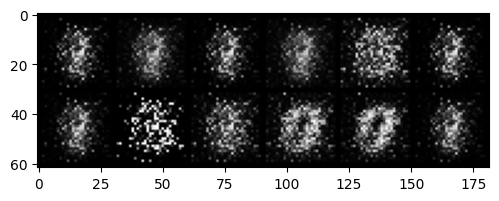


======== Epoch 16 =======
Loss     => G:1.46360, D:0.52545
Accuracy => G:7.29%, D:78.43%, Elapsed time => 11.731 sec

======== Epoch 17 =======
Loss     => G:1.26947, D:0.55503
Accuracy => G:12.89%, D:73.18%, Elapsed time => 11.765 sec

======== Epoch 18 =======
Loss     => G:1.43723, D:0.48172
Accuracy => G:7.06%, D:79.63%, Elapsed time => 11.880 sec

======== Epoch 19 =======
Loss     => G:1.90569, D:0.43877
Accuracy => G:5.14%, D:82.17%, Elapsed time => 12.020 sec

======== Epoch 20 =======
Loss     => G:1.98705, D:0.41556
Accuracy => G:3.82%, D:83.81%, Elapsed time => 12.135 sec


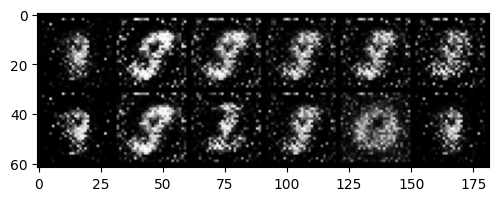


======== Epoch 21 =======
Loss     => G:1.97303, D:0.45718
Accuracy => G:3.57%, D:81.85%, Elapsed time => 12.000 sec

======== Epoch 22 =======
Loss     => G:2.19454, D:0.41816
Accuracy => G:3.31%, D:84.33%, Elapsed time => 11.857 sec

======== Epoch 23 =======
Loss     => G:1.97754, D:0.33424
Accuracy => G:3.44%, D:87.51%, Elapsed time => 12.040 sec

======== Epoch 24 =======
Loss     => G:1.81948, D:0.39558
Accuracy => G:4.39%, D:84.32%, Elapsed time => 12.241 sec

======== Epoch 25 =======
Loss     => G:2.38215, D:0.31935
Accuracy => G:2.05%, D:88.44%, Elapsed time => 12.080 sec


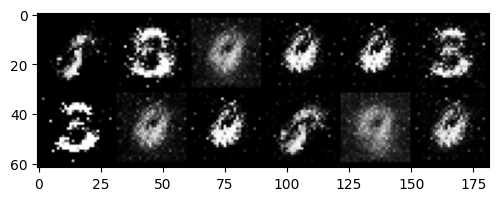


======== Epoch 26 =======
Loss     => G:2.43811, D:0.36042
Accuracy => G:3.71%, D:85.75%, Elapsed time => 12.133 sec

======== Epoch 27 =======
Loss     => G:2.19030, D:0.47237
Accuracy => G:5.55%, D:81.18%, Elapsed time => 12.216 sec

======== Epoch 28 =======
Loss     => G:2.06432, D:0.37651
Accuracy => G:4.36%, D:85.31%, Elapsed time => 12.131 sec

======== Epoch 29 =======
Loss     => G:1.94528, D:0.40224
Accuracy => G:4.74%, D:84.17%, Elapsed time => 12.001 sec

======== Epoch 30 =======
Loss     => G:2.21516, D:0.39577
Accuracy => G:5.14%, D:83.84%, Elapsed time => 12.184 sec


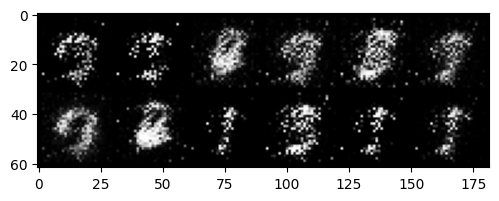


======== Epoch 31 =======
Loss     => G:2.63758, D:0.37500
Accuracy => G:4.48%, D:85.08%, Elapsed time => 12.209 sec

======== Epoch 32 =======
Loss     => G:2.36532, D:0.30991
Accuracy => G:2.70%, D:88.56%, Elapsed time => 12.212 sec

======== Epoch 33 =======
Loss     => G:2.52365, D:0.35675
Accuracy => G:3.95%, D:86.31%, Elapsed time => 12.293 sec

======== Epoch 34 =======
Loss     => G:2.44071, D:0.30897
Accuracy => G:3.09%, D:88.34%, Elapsed time => 12.402 sec

======== Epoch 35 =======
Loss     => G:1.95839, D:0.40242
Accuracy => G:5.89%, D:83.77%, Elapsed time => 12.267 sec


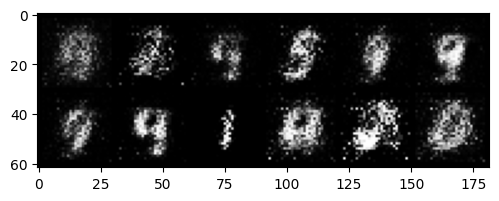


======== Epoch 36 =======
Loss     => G:2.17690, D:0.34339
Accuracy => G:5.22%, D:86.53%, Elapsed time => 12.309 sec

======== Epoch 37 =======
Loss     => G:2.18386, D:0.39946
Accuracy => G:7.42%, D:83.69%, Elapsed time => 12.394 sec

======== Epoch 38 =======
Loss     => G:2.12884, D:0.38996
Accuracy => G:6.61%, D:83.90%, Elapsed time => 12.566 sec

======== Epoch 39 =======
Loss     => G:2.31678, D:0.38587
Accuracy => G:6.47%, D:83.77%, Elapsed time => 12.582 sec

======== Epoch 40 =======
Loss     => G:2.45290, D:0.31383
Accuracy => G:4.24%, D:87.75%, Elapsed time => 12.419 sec


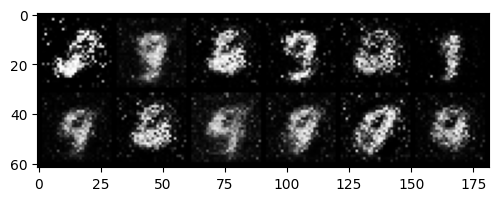


======== Epoch 41 =======
Loss     => G:2.65856, D:0.35858
Accuracy => G:4.65%, D:85.61%, Elapsed time => 12.259 sec

======== Epoch 42 =======
Loss     => G:2.90151, D:0.35219
Accuracy => G:4.33%, D:86.08%, Elapsed time => 12.478 sec

======== Epoch 43 =======
Loss     => G:3.12809, D:0.29666
Accuracy => G:4.28%, D:88.24%, Elapsed time => 12.506 sec

======== Epoch 44 =======
Loss     => G:3.04695, D:0.28303
Accuracy => G:3.54%, D:89.51%, Elapsed time => 12.478 sec

======== Epoch 45 =======
Loss     => G:2.78952, D:0.30844
Accuracy => G:4.36%, D:87.95%, Elapsed time => 12.597 sec


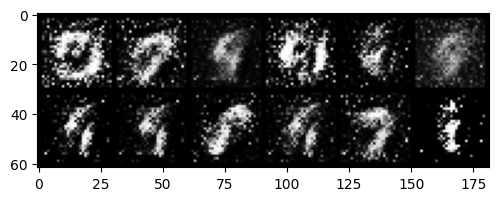


======== Epoch 46 =======
Loss     => G:2.46443, D:0.31201
Accuracy => G:4.62%, D:87.70%, Elapsed time => 12.653 sec

======== Epoch 47 =======
Loss     => G:2.39546, D:0.28818
Accuracy => G:4.53%, D:88.66%, Elapsed time => 12.716 sec

======== Epoch 48 =======
Loss     => G:2.29963, D:0.28952
Accuracy => G:4.14%, D:88.76%, Elapsed time => 12.585 sec

======== Epoch 49 =======
Loss     => G:2.76055, D:0.28059
Accuracy => G:4.24%, D:88.77%, Elapsed time => 12.911 sec

======== Epoch 50 =======
Loss     => G:2.46159, D:0.31326
Accuracy => G:5.49%, D:87.48%, Elapsed time => 28.895 sec


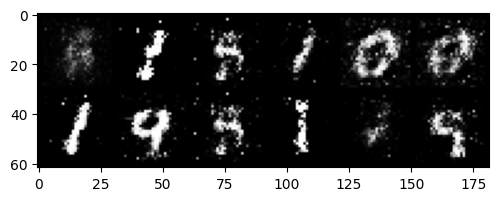


======== Epoch 51 =======
Loss     => G:2.22674, D:0.30157
Accuracy => G:5.58%, D:88.04%, Elapsed time => 30.647 sec

======== Epoch 52 =======
Loss     => G:2.41636, D:0.29887
Accuracy => G:5.72%, D:87.77%, Elapsed time => 21.434 sec

======== Epoch 53 =======
Loss     => G:2.38318, D:0.28783
Accuracy => G:5.02%, D:88.72%, Elapsed time => 25.258 sec

======== Epoch 54 =======
Loss     => G:2.30262, D:0.32604
Accuracy => G:6.74%, D:86.47%, Elapsed time => 32.107 sec

======== Epoch 55 =======
Loss     => G:2.30806, D:0.32910
Accuracy => G:6.70%, D:86.34%, Elapsed time => 31.723 sec


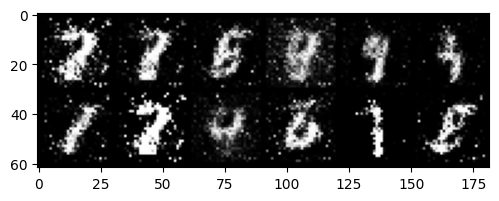


======== Epoch 56 =======
Loss     => G:2.36896, D:0.34479
Accuracy => G:7.36%, D:85.46%, Elapsed time => 14.417 sec

======== Epoch 57 =======
Loss     => G:2.70817, D:0.31003
Accuracy => G:6.09%, D:87.25%, Elapsed time => 21.516 sec

======== Epoch 58 =======
Loss     => G:2.56034, D:0.33679
Accuracy => G:6.86%, D:86.14%, Elapsed time => 30.965 sec

======== Epoch 59 =======
Loss     => G:2.31497, D:0.33438
Accuracy => G:7.28%, D:85.81%, Elapsed time => 31.543 sec

======== Epoch 60 =======
Loss     => G:2.23927, D:0.34158
Accuracy => G:7.75%, D:85.62%, Elapsed time => 31.574 sec


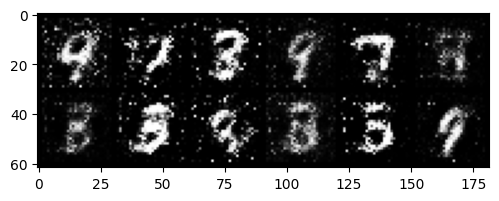


======== Epoch 61 =======
Loss     => G:2.07774, D:0.34047
Accuracy => G:7.44%, D:85.54%, Elapsed time => 30.824 sec

======== Epoch 62 =======
Loss     => G:1.98410, D:0.36936
Accuracy => G:8.24%, D:84.23%, Elapsed time => 31.522 sec

======== Epoch 63 =======
Loss     => G:2.14612, D:0.37302
Accuracy => G:8.98%, D:84.02%, Elapsed time => 28.433 sec

======== Epoch 64 =======
Loss     => G:2.00890, D:0.38244
Accuracy => G:9.49%, D:83.38%, Elapsed time => 13.017 sec

======== Epoch 65 =======
Loss     => G:1.97302, D:0.38397
Accuracy => G:9.43%, D:83.21%, Elapsed time => 12.999 sec


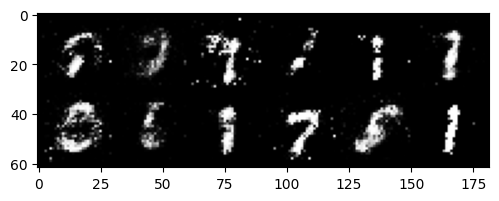


======== Epoch 66 =======
Loss     => G:1.86159, D:0.38576
Accuracy => G:10.19%, D:83.02%, Elapsed time => 13.110 sec

======== Epoch 67 =======
Loss     => G:1.99128, D:0.35771
Accuracy => G:9.00%, D:84.35%, Elapsed time => 13.597 sec

======== Epoch 68 =======
Loss     => G:2.10649, D:0.36134
Accuracy => G:9.14%, D:84.13%, Elapsed time => 13.064 sec

======== Epoch 69 =======
Loss     => G:2.12788, D:0.35588
Accuracy => G:9.05%, D:84.39%, Elapsed time => 13.183 sec

======== Epoch 70 =======
Loss     => G:2.00540, D:0.36948
Accuracy => G:9.87%, D:83.61%, Elapsed time => 13.267 sec


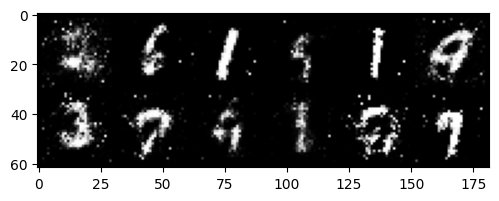


======== Epoch 71 =======
Loss     => G:1.90700, D:0.38258
Accuracy => G:10.72%, D:82.90%, Elapsed time => 13.265 sec

======== Epoch 72 =======
Loss     => G:1.87673, D:0.38358
Accuracy => G:11.03%, D:82.85%, Elapsed time => 13.239 sec

======== Epoch 73 =======
Loss     => G:1.87064, D:0.38852
Accuracy => G:10.76%, D:82.59%, Elapsed time => 13.431 sec

======== Epoch 74 =======
Loss     => G:1.90116, D:0.37718
Accuracy => G:10.47%, D:83.15%, Elapsed time => 13.616 sec

======== Epoch 75 =======
Loss     => G:1.88254, D:0.38226
Accuracy => G:10.71%, D:82.95%, Elapsed time => 13.582 sec


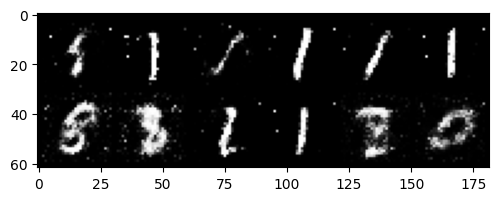


======== Epoch 76 =======
Loss     => G:1.87591, D:0.38923
Accuracy => G:11.34%, D:82.45%, Elapsed time => 13.679 sec

======== Epoch 77 =======
Loss     => G:1.81088, D:0.39274
Accuracy => G:11.62%, D:82.27%, Elapsed time => 13.722 sec

======== Epoch 78 =======
Loss     => G:1.81694, D:0.39895
Accuracy => G:12.09%, D:81.74%, Elapsed time => 13.728 sec

======== Epoch 79 =======
Loss     => G:1.83087, D:0.39304
Accuracy => G:11.93%, D:82.18%, Elapsed time => 13.703 sec

======== Epoch 80 =======
Loss     => G:1.84390, D:0.39107
Accuracy => G:11.54%, D:82.30%, Elapsed time => 13.816 sec


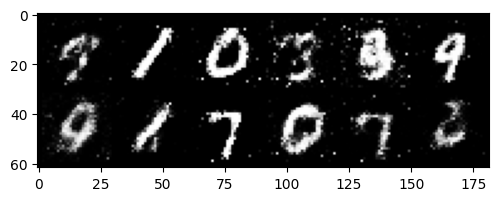


======== Epoch 81 =======
Loss     => G:1.93531, D:0.38268
Accuracy => G:11.14%, D:82.64%, Elapsed time => 13.832 sec

======== Epoch 82 =======
Loss     => G:1.90547, D:0.38640
Accuracy => G:11.55%, D:82.69%, Elapsed time => 13.755 sec

======== Epoch 83 =======
Loss     => G:1.81945, D:0.39067
Accuracy => G:11.91%, D:82.21%, Elapsed time => 13.947 sec

======== Epoch 84 =======
Loss     => G:1.80954, D:0.39257
Accuracy => G:11.81%, D:82.20%, Elapsed time => 14.018 sec

======== Epoch 85 =======
Loss     => G:1.82600, D:0.40032
Accuracy => G:12.58%, D:81.72%, Elapsed time => 13.903 sec


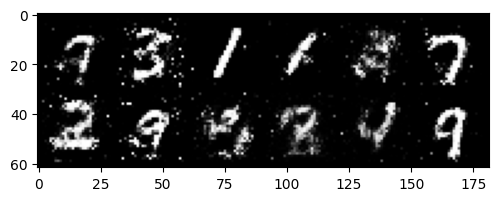


======== Epoch 86 =======
Loss     => G:1.74444, D:0.40367
Accuracy => G:12.66%, D:81.54%, Elapsed time => 13.994 sec

======== Epoch 87 =======
Loss     => G:1.75350, D:0.40621
Accuracy => G:12.56%, D:81.28%, Elapsed time => 13.804 sec

======== Epoch 88 =======
Loss     => G:1.70718, D:0.42103
Accuracy => G:13.53%, D:80.45%, Elapsed time => 13.785 sec

======== Epoch 89 =======
Loss     => G:1.68310, D:0.41853
Accuracy => G:13.24%, D:80.42%, Elapsed time => 13.761 sec

======== Epoch 90 =======
Loss     => G:1.66424, D:0.42158
Accuracy => G:13.90%, D:80.39%, Elapsed time => 13.801 sec


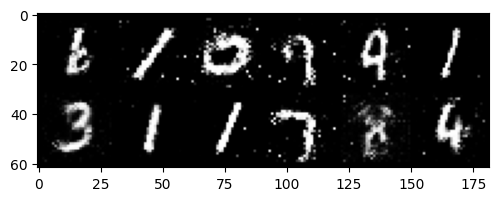


======== Epoch 91 =======
Loss     => G:1.63640, D:0.42902
Accuracy => G:14.13%, D:80.12%, Elapsed time => 13.928 sec

======== Epoch 92 =======
Loss     => G:1.63516, D:0.43215
Accuracy => G:13.95%, D:79.78%, Elapsed time => 13.818 sec

======== Epoch 93 =======
Loss     => G:1.62460, D:0.42878
Accuracy => G:13.69%, D:79.93%, Elapsed time => 13.887 sec

======== Epoch 94 =======
Loss     => G:1.65040, D:0.42334
Accuracy => G:13.88%, D:80.23%, Elapsed time => 13.832 sec

======== Epoch 95 =======
Loss     => G:1.64304, D:0.42663
Accuracy => G:14.06%, D:80.08%, Elapsed time => 13.888 sec


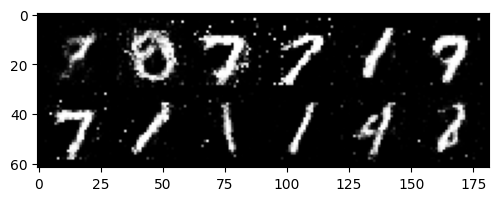


======== Epoch 96 =======
Loss     => G:1.62338, D:0.43140
Accuracy => G:14.18%, D:79.80%, Elapsed time => 14.021 sec

======== Epoch 97 =======
Loss     => G:1.55722, D:0.44786
Accuracy => G:14.74%, D:78.75%, Elapsed time => 13.996 sec

======== Epoch 98 =======
Loss     => G:1.56519, D:0.44784
Accuracy => G:14.95%, D:78.73%, Elapsed time => 13.935 sec

======== Epoch 99 =======
Loss     => G:1.50732, D:0.45485
Accuracy => G:15.82%, D:78.14%, Elapsed time => 13.952 sec

======== Epoch 100 =======
Loss     => G:1.47436, D:0.46437
Accuracy => G:16.30%, D:77.77%, Elapsed time => 13.966 sec


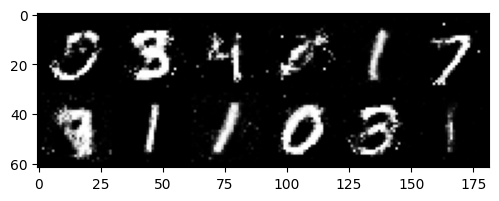


======== Epoch 101 =======
Loss     => G:1.51327, D:0.45837
Accuracy => G:15.72%, D:78.01%, Elapsed time => 13.945 sec

======== Epoch 102 =======
Loss     => G:1.48563, D:0.46553
Accuracy => G:16.09%, D:77.57%, Elapsed time => 13.967 sec

======== Epoch 103 =======
Loss     => G:1.47745, D:0.46677
Accuracy => G:16.15%, D:77.34%, Elapsed time => 14.499 sec

======== Epoch 104 =======
Loss     => G:1.45372, D:0.47201
Accuracy => G:16.67%, D:77.17%, Elapsed time => 13.756 sec

======== Epoch 105 =======
Loss     => G:1.43831, D:0.47526
Accuracy => G:16.78%, D:76.95%, Elapsed time => 13.817 sec


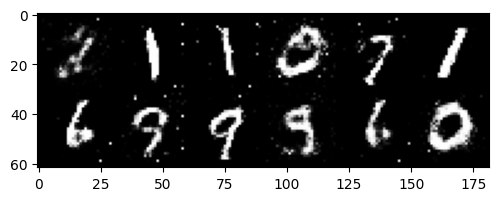


======== Epoch 106 =======
Loss     => G:1.41345, D:0.47763
Accuracy => G:16.98%, D:76.64%, Elapsed time => 13.921 sec

======== Epoch 107 =======
Loss     => G:1.40694, D:0.48592
Accuracy => G:17.24%, D:76.18%, Elapsed time => 13.870 sec

======== Epoch 108 =======
Loss     => G:1.39038, D:0.48638
Accuracy => G:17.26%, D:76.11%, Elapsed time => 13.893 sec

======== Epoch 109 =======
Loss     => G:1.36162, D:0.48791
Accuracy => G:17.69%, D:76.18%, Elapsed time => 14.016 sec

======== Epoch 110 =======
Loss     => G:1.37035, D:0.49064
Accuracy => G:18.10%, D:75.86%, Elapsed time => 13.950 sec


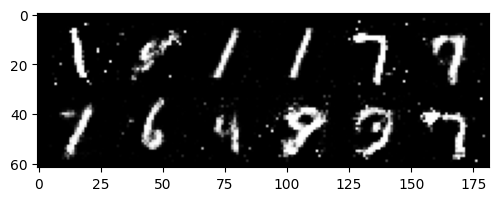


======== Epoch 111 =======
Loss     => G:1.36391, D:0.49358
Accuracy => G:18.42%, D:75.52%, Elapsed time => 13.914 sec

======== Epoch 112 =======
Loss     => G:1.36514, D:0.49205
Accuracy => G:18.34%, D:75.50%, Elapsed time => 13.786 sec

======== Epoch 113 =======
Loss     => G:1.33580, D:0.49794
Accuracy => G:18.64%, D:75.08%, Elapsed time => 13.837 sec

======== Epoch 114 =======
Loss     => G:1.36243, D:0.49430
Accuracy => G:17.92%, D:75.42%, Elapsed time => 13.794 sec

======== Epoch 115 =======
Loss     => G:1.34838, D:0.49370
Accuracy => G:17.93%, D:75.61%, Elapsed time => 13.700 sec


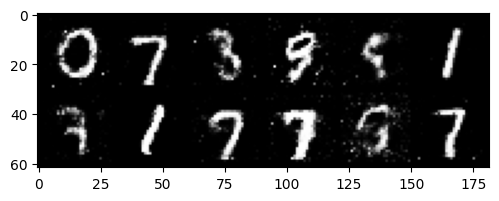


======== Epoch 116 =======
Loss     => G:1.35239, D:0.49473
Accuracy => G:18.13%, D:75.47%, Elapsed time => 13.891 sec

======== Epoch 117 =======
Loss     => G:1.33671, D:0.49660
Accuracy => G:18.22%, D:75.37%, Elapsed time => 13.901 sec

======== Epoch 118 =======
Loss     => G:1.31464, D:0.50319
Accuracy => G:18.84%, D:74.84%, Elapsed time => 14.033 sec

======== Epoch 119 =======
Loss     => G:1.32625, D:0.50574
Accuracy => G:19.02%, D:74.80%, Elapsed time => 14.248 sec

======== Epoch 120 =======
Loss     => G:1.30279, D:0.50520
Accuracy => G:19.18%, D:74.82%, Elapsed time => 14.102 sec


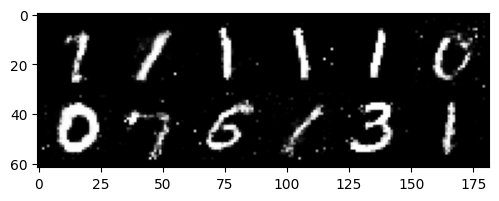


======== Epoch 121 =======
Loss     => G:1.32190, D:0.50517
Accuracy => G:19.02%, D:74.73%, Elapsed time => 14.030 sec

======== Epoch 122 =======
Loss     => G:1.30234, D:0.50958
Accuracy => G:19.65%, D:74.32%, Elapsed time => 13.883 sec

======== Epoch 123 =======
Loss     => G:1.31934, D:0.50898
Accuracy => G:19.01%, D:74.53%, Elapsed time => 13.902 sec

======== Epoch 124 =======
Loss     => G:1.28600, D:0.51346
Accuracy => G:19.62%, D:74.07%, Elapsed time => 13.982 sec

======== Epoch 125 =======
Loss     => G:1.27960, D:0.51391
Accuracy => G:19.90%, D:74.08%, Elapsed time => 13.986 sec


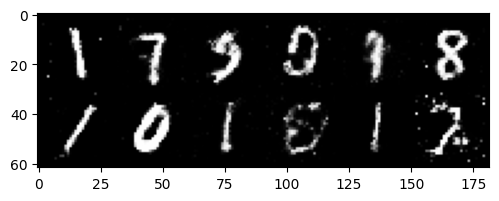


======== Epoch 126 =======
Loss     => G:1.28221, D:0.51683
Accuracy => G:19.79%, D:73.88%, Elapsed time => 14.000 sec

======== Epoch 127 =======
Loss     => G:1.29158, D:0.51392
Accuracy => G:20.15%, D:74.19%, Elapsed time => 13.917 sec

======== Epoch 128 =======
Loss     => G:1.27213, D:0.51644
Accuracy => G:20.10%, D:73.97%, Elapsed time => 13.866 sec

======== Epoch 129 =======
Loss     => G:1.27065, D:0.51327
Accuracy => G:19.69%, D:74.13%, Elapsed time => 14.018 sec

======== Epoch 130 =======
Loss     => G:1.27442, D:0.51650
Accuracy => G:19.67%, D:74.10%, Elapsed time => 13.750 sec


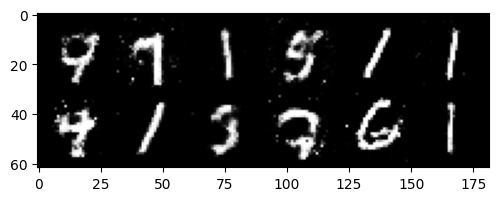


======== Epoch 131 =======
Loss     => G:1.27202, D:0.51477
Accuracy => G:20.03%, D:74.10%, Elapsed time => 13.850 sec

======== Epoch 132 =======
Loss     => G:1.29041, D:0.51445
Accuracy => G:19.58%, D:74.07%, Elapsed time => 14.086 sec

======== Epoch 133 =======
Loss     => G:1.27721, D:0.51825
Accuracy => G:20.20%, D:73.86%, Elapsed time => 13.808 sec

======== Epoch 134 =======
Loss     => G:1.28252, D:0.51603
Accuracy => G:19.71%, D:73.93%, Elapsed time => 13.843 sec

======== Epoch 135 =======
Loss     => G:1.26660, D:0.51515
Accuracy => G:20.10%, D:74.01%, Elapsed time => 13.883 sec


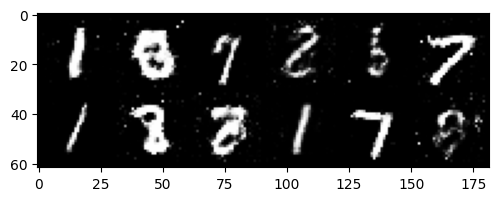


======== Epoch 136 =======
Loss     => G:1.27046, D:0.52064
Accuracy => G:20.22%, D:73.74%, Elapsed time => 13.862 sec

======== Epoch 137 =======
Loss     => G:1.25640, D:0.51912
Accuracy => G:20.15%, D:73.77%, Elapsed time => 13.729 sec

======== Epoch 138 =======
Loss     => G:1.26040, D:0.52014
Accuracy => G:19.82%, D:73.54%, Elapsed time => 13.820 sec

======== Epoch 139 =======
Loss     => G:1.26193, D:0.51715
Accuracy => G:19.99%, D:73.93%, Elapsed time => 13.900 sec

======== Epoch 140 =======
Loss     => G:1.25248, D:0.51907
Accuracy => G:20.34%, D:73.66%, Elapsed time => 13.678 sec


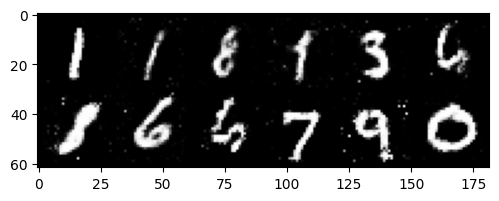


======== Epoch 141 =======
Loss     => G:1.25770, D:0.52045
Accuracy => G:20.35%, D:73.59%, Elapsed time => 13.817 sec

======== Epoch 142 =======
Loss     => G:1.24941, D:0.52500
Accuracy => G:20.67%, D:73.26%, Elapsed time => 13.882 sec

======== Epoch 143 =======
Loss     => G:1.23525, D:0.52560
Accuracy => G:20.92%, D:73.27%, Elapsed time => 13.784 sec

======== Epoch 144 =======
Loss     => G:1.24732, D:0.53039
Accuracy => G:20.73%, D:72.74%, Elapsed time => 13.765 sec

======== Epoch 145 =======
Loss     => G:1.22324, D:0.52809
Accuracy => G:21.01%, D:72.96%, Elapsed time => 13.732 sec


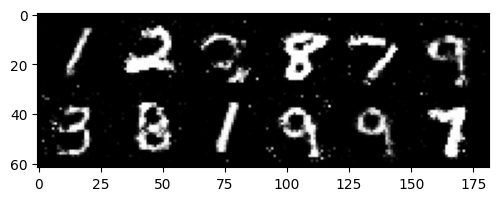


======== Epoch 146 =======
Loss     => G:1.22378, D:0.53439
Accuracy => G:21.31%, D:72.47%, Elapsed time => 13.767 sec

======== Epoch 147 =======
Loss     => G:1.22294, D:0.52648
Accuracy => G:20.87%, D:73.14%, Elapsed time => 13.912 sec

======== Epoch 148 =======
Loss     => G:1.21473, D:0.52938
Accuracy => G:21.04%, D:72.88%, Elapsed time => 13.782 sec

======== Epoch 149 =======
Loss     => G:1.20863, D:0.53235
Accuracy => G:21.29%, D:72.68%, Elapsed time => 13.735 sec

======== Epoch 150 =======
Loss     => G:1.22233, D:0.53706
Accuracy => G:21.26%, D:72.31%, Elapsed time => 13.733 sec


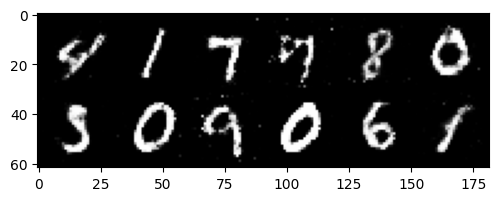


======== Epoch 151 =======
Loss     => G:1.20511, D:0.53396
Accuracy => G:21.45%, D:72.63%, Elapsed time => 13.794 sec

======== Epoch 152 =======
Loss     => G:1.20056, D:0.53456
Accuracy => G:21.40%, D:72.57%, Elapsed time => 13.933 sec

======== Epoch 153 =======
Loss     => G:1.21355, D:0.53880
Accuracy => G:21.94%, D:72.21%, Elapsed time => 13.719 sec

======== Epoch 154 =======
Loss     => G:1.20352, D:0.53478
Accuracy => G:22.02%, D:72.53%, Elapsed time => 13.800 sec

======== Epoch 155 =======
Loss     => G:1.19605, D:0.53819
Accuracy => G:21.44%, D:72.28%, Elapsed time => 13.817 sec


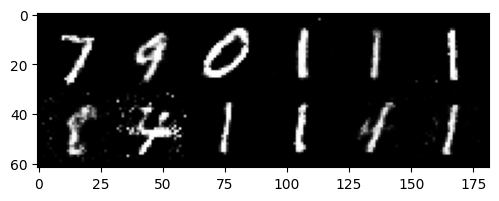


======== Epoch 156 =======
Loss     => G:1.20125, D:0.53965
Accuracy => G:22.14%, D:72.03%, Elapsed time => 13.983 sec

======== Epoch 157 =======
Loss     => G:1.18662, D:0.54421
Accuracy => G:22.08%, D:71.66%, Elapsed time => 13.860 sec

======== Epoch 158 =======
Loss     => G:1.17890, D:0.54135
Accuracy => G:22.45%, D:71.99%, Elapsed time => 13.876 sec

======== Epoch 159 =======
Loss     => G:1.17819, D:0.54285
Accuracy => G:22.00%, D:71.81%, Elapsed time => 13.912 sec

======== Epoch 160 =======
Loss     => G:1.19455, D:0.54241
Accuracy => G:22.19%, D:71.96%, Elapsed time => 13.927 sec


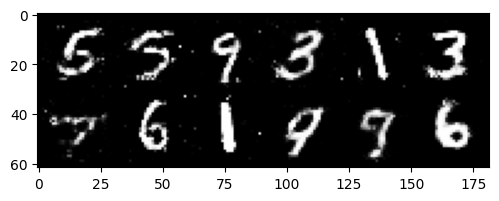


======== Epoch 161 =======
Loss     => G:1.17873, D:0.54236
Accuracy => G:22.14%, D:71.83%, Elapsed time => 13.864 sec

======== Epoch 162 =======
Loss     => G:1.17905, D:0.54287
Accuracy => G:21.90%, D:71.93%, Elapsed time => 13.956 sec

======== Epoch 163 =======
Loss     => G:1.15828, D:0.54773
Accuracy => G:22.49%, D:71.51%, Elapsed time => 13.898 sec

======== Epoch 164 =======
Loss     => G:1.17244, D:0.54417
Accuracy => G:21.92%, D:71.70%, Elapsed time => 13.839 sec

======== Epoch 165 =======
Loss     => G:1.17422, D:0.54450
Accuracy => G:21.88%, D:71.67%, Elapsed time => 13.989 sec


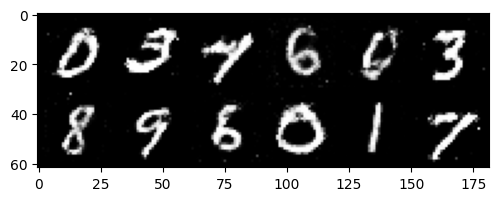


======== Epoch 166 =======
Loss     => G:1.16624, D:0.54644
Accuracy => G:21.90%, D:71.41%, Elapsed time => 13.895 sec

======== Epoch 167 =======
Loss     => G:1.16409, D:0.54703
Accuracy => G:22.52%, D:71.38%, Elapsed time => 13.905 sec

======== Epoch 168 =======
Loss     => G:1.16791, D:0.54838
Accuracy => G:22.32%, D:71.28%, Elapsed time => 13.934 sec

======== Epoch 169 =======
Loss     => G:1.17414, D:0.54353
Accuracy => G:22.25%, D:71.74%, Elapsed time => 14.015 sec

======== Epoch 170 =======
Loss     => G:1.18608, D:0.54304
Accuracy => G:22.19%, D:71.64%, Elapsed time => 14.018 sec


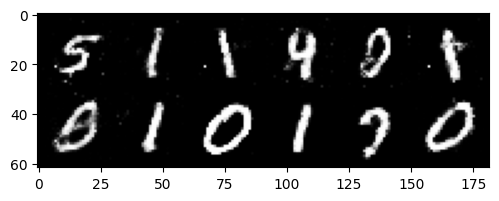


======== Epoch 171 =======
Loss     => G:1.16697, D:0.54447
Accuracy => G:22.39%, D:71.49%, Elapsed time => 13.691 sec

======== Epoch 172 =======
Loss     => G:1.17155, D:0.54334
Accuracy => G:22.03%, D:71.85%, Elapsed time => 13.788 sec

======== Epoch 173 =======
Loss     => G:1.16583, D:0.54619
Accuracy => G:22.32%, D:71.48%, Elapsed time => 13.896 sec

======== Epoch 174 =======
Loss     => G:1.16938, D:0.54555
Accuracy => G:22.26%, D:71.47%, Elapsed time => 13.783 sec

======== Epoch 175 =======
Loss     => G:1.16628, D:0.54710
Accuracy => G:22.17%, D:71.25%, Elapsed time => 13.704 sec


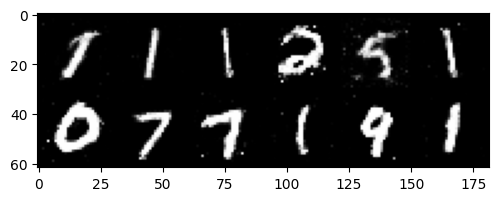


======== Epoch 176 =======
Loss     => G:1.16748, D:0.54590
Accuracy => G:22.02%, D:71.48%, Elapsed time => 13.963 sec

======== Epoch 177 =======
Loss     => G:1.17038, D:0.54614
Accuracy => G:22.58%, D:71.46%, Elapsed time => 13.700 sec

======== Epoch 178 =======
Loss     => G:1.16938, D:0.54445
Accuracy => G:21.95%, D:71.80%, Elapsed time => 13.683 sec

======== Epoch 179 =======
Loss     => G:1.16136, D:0.54591
Accuracy => G:22.08%, D:71.39%, Elapsed time => 13.933 sec

======== Epoch 180 =======
Loss     => G:1.15823, D:0.54393
Accuracy => G:22.63%, D:71.68%, Elapsed time => 13.834 sec


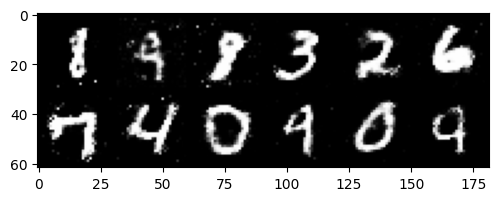


======== Epoch 181 =======
Loss     => G:1.16063, D:0.54815
Accuracy => G:22.26%, D:71.17%, Elapsed time => 13.725 sec

======== Epoch 182 =======
Loss     => G:1.17465, D:0.54777
Accuracy => G:22.08%, D:71.37%, Elapsed time => 13.917 sec

======== Epoch 183 =======
Loss     => G:1.16352, D:0.55010
Accuracy => G:22.33%, D:71.18%, Elapsed time => 14.089 sec

======== Epoch 184 =======
Loss     => G:1.15522, D:0.54814
Accuracy => G:22.14%, D:71.24%, Elapsed time => 14.232 sec

======== Epoch 185 =======
Loss     => G:1.13893, D:0.54797
Accuracy => G:22.37%, D:71.35%, Elapsed time => 18.879 sec


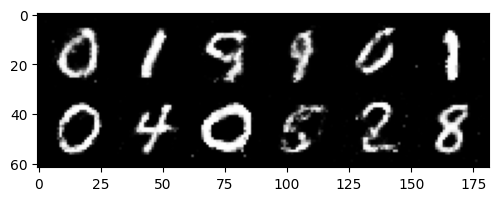


======== Epoch 186 =======
Loss     => G:1.16016, D:0.54867
Accuracy => G:21.85%, D:71.50%, Elapsed time => 32.294 sec

======== Epoch 187 =======
Loss     => G:1.16299, D:0.54584
Accuracy => G:21.82%, D:71.50%, Elapsed time => 15.676 sec

======== Epoch 188 =======
Loss     => G:1.15560, D:0.54696
Accuracy => G:22.19%, D:71.50%, Elapsed time => 14.247 sec

======== Epoch 189 =======
Loss     => G:1.15308, D:0.55097
Accuracy => G:22.61%, D:70.99%, Elapsed time => 14.199 sec

======== Epoch 190 =======
Loss     => G:1.15500, D:0.54649
Accuracy => G:22.32%, D:71.41%, Elapsed time => 14.254 sec


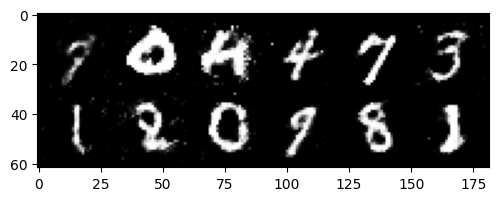


======== Epoch 191 =======
Loss     => G:1.15975, D:0.54978
Accuracy => G:22.17%, D:71.14%, Elapsed time => 14.302 sec

======== Epoch 192 =======
Loss     => G:1.16061, D:0.54647
Accuracy => G:21.90%, D:71.56%, Elapsed time => 14.147 sec

======== Epoch 193 =======
Loss     => G:1.15347, D:0.54862
Accuracy => G:22.36%, D:71.29%, Elapsed time => 14.156 sec

======== Epoch 194 =======
Loss     => G:1.14856, D:0.54865
Accuracy => G:21.81%, D:71.10%, Elapsed time => 14.249 sec

======== Epoch 195 =======
Loss     => G:1.15189, D:0.54825
Accuracy => G:22.44%, D:71.28%, Elapsed time => 14.181 sec


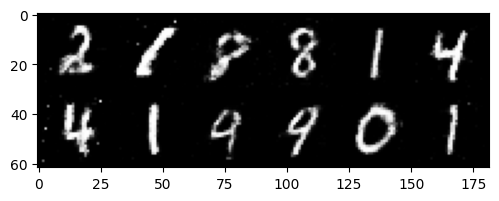


======== Epoch 196 =======
Loss     => G:1.15445, D:0.54655
Accuracy => G:22.01%, D:71.40%, Elapsed time => 14.116 sec

======== Epoch 197 =======
Loss     => G:1.15253, D:0.55034
Accuracy => G:22.49%, D:71.09%, Elapsed time => 14.018 sec

======== Epoch 198 =======
Loss     => G:1.15576, D:0.54963
Accuracy => G:22.67%, D:71.32%, Elapsed time => 13.916 sec

======== Epoch 199 =======
Loss     => G:1.15708, D:0.54852
Accuracy => G:22.13%, D:71.22%, Elapsed time => 14.079 sec

======== Epoch 200 =======
Loss     => G:1.16009, D:0.55133
Accuracy => G:22.52%, D:70.97%, Elapsed time => 14.141 sec


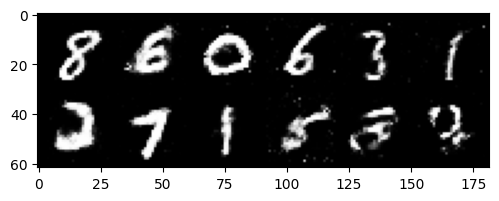

In [13]:
import time 

for epoch in range(200):
    start = time.time()
    D_train_loss, D_accuracy, D_count = 0., 0., 0.
    G_train_loss, G_accuracy, G_count = 0., 0., 0.
    
    for xb in train_loader:
        xb = xb[0]
        
        ### train Discriminator
        real_x = xb.view(-1, 784)
        real_y = torch.ones(len(xb), 1).to(device)
        D_out = Discriminator(real_x)
        D_real_loss = criterion(D_out, real_y)
        D_accuracy += (D_out>0.5).float().eq(real_y.data).sum()
                
        z = torch.randn(len(xb), d_z).to(device)
        fake_x = Generator(z)
        fake_y = torch.zeros(len(xb), 1).to(device)
        D_out = Discriminator(fake_x)
        D_fake_loss = criterion(D_out, fake_y)
        D_accuracy += (D_out>0.5).float().eq(fake_y.data).sum()
        
        D_loss = D_real_loss + D_fake_loss
        D_train_loss += D_loss.item()*len(xb)
        D_count += len(xb)*2
        
        D_loss.backward()
        D_optimizer.step()
        D_optimizer.zero_grad()
        G_optimizer.zero_grad()
        
        
        ### train Generator
        z = torch.randn(len(xb), d_z).to(device)
        fake_x = Generator(z)
        fake_y = torch.ones(len(xb), 1).to(device)
        D_out = Discriminator(fake_x)
        G_loss = criterion(D_out, fake_y)
        G_accuracy += (D_out>0.5).float().eq(fake_y.data).sum()
        
        G_train_loss += G_loss.item()*len(xb)
        G_count += len(xb)
        
        G_loss.backward()
        G_optimizer.step()
        G_optimizer.zero_grad()
        D_optimizer.zero_grad()
    
       
    D_train_loss /= D_count
    G_train_loss /= G_count
    D_accuracy   /= D_count
    G_accuracy   /= G_count
            
    print(f"======== Epoch {epoch+1} =======")
    print(f"Loss     => G:{G_train_loss:.5f}, D:{D_train_loss:.5f}")
    print(f"Accuracy => G:{G_accuracy*100:.2f}%, D:{D_accuracy*100:.2f}%, Elapsed time => {time.time()-start:.3f} sec")
    
    ### visualize progress
    if (epoch+1)%5 == 0:
        generated_img = torchvision.utils.make_grid(fake_x.view(-1,1,28,28)[:12], nrow=6, normalize=True)
        plt.figure(figsize=(15,2))
        plt.imshow(np.transpose(generated_img.numpy(),(1,2,0)))
        plt.show()
    print("=======================================\n")